### Tutorial 10: Working with Time Data in PostgreSQL

In this tutorial, we will explore how to work with timestamps, dates, and other time-related columns in PostgreSQL. 

**Working with Timestamps and Dates in PostgreSQL**

####  PostgreSQL Week, Month, and Year Functions Explained

### 1. `EXTRACT(WEEK FROM date)`
- **Purpose**: Retrieves the **week number** of the year from a date.
- **Range**: 1 to 53.
- **Example**:
  ```sql
  SELECT EXTRACT(WEEK FROM '2025-01-31'::DATE);
  ```
  **Output**: `5`
  
### 2. `EXTRACT(DOW FROM date)`
- **Purpose**: Extracts the **day of the week**.
- **Range**: 0 = Sunday, 6 = Saturday.
- **Example**:
  ```sql
  SELECT EXTRACT(DOW FROM '2025-01-31'::DATE);
  ```
  **Output**: `5` (Friday)

### 3. `EXTRACT(ISODOW FROM date)`
- **Purpose**: Extracts the **ISO standard day of the week**.
- **Range**: 1 = Monday, 7 = Sunday.
- **Example**:
  ```sql
  SELECT EXTRACT(ISODOW FROM '2025-01-31'::DATE);
  ```
  **Output**: `5` (Friday)

### 4. `EXTRACT(MONTH FROM date)`
- **Purpose**: Extracts the **month** from a date.
- **Range**: 1 to 12.
- **Example**:
  ```sql
  SELECT EXTRACT(MONTH FROM '2025-01-31'::DATE);
  ```
  **Output**: `1`

### 5. `EXTRACT(YEAR FROM date)`
- **Purpose**: Extracts the **year** from a date.
- **Example**:
  ```sql
  SELECT EXTRACT(YEAR FROM '2025-01-31'::DATE);
  ```
  **Output**: `2025`

### 6. `TO_CHAR(date, 'Month')`
- **Purpose**: Extracts the **full month name** from a date.
- **Example**:
  ```sql
  SELECT TO_CHAR('2025-01-31'::DATE, 'Month');
  ```
  **Output**: `January`

### 7. `DATE_TRUNC('week', date)`
- **Purpose**: Returns the **start of the week (Monday)** for a given date.
- **Example**:
  ```sql
  SELECT DATE_TRUNC('week', '2025-01-31'::DATE);
  ```
  **Output**: `2025-01-27`

### 8. `DATE_TRUNC('week', date) + INTERVAL '6 days'`
- **Purpose**: Returns the **end of the week (Sunday)** for a given date.
- **Example**:
  ```sql
  SELECT DATE_TRUNC('week', '2025-01-31'::DATE) + INTERVAL '6 days';
  ```
  **Output**: `2025-02-02`

### Summary
| Function | Purpose | Example |
|----------|---------|---------|
| `EXTRACT(WEEK FROM date)` | Week number of the year (1-53) | `5` |
| `EXTRACT(DOW FROM date)` | Day of the week (0=Sunday, 6=Saturday) | `5` (Friday) |
| `EXTRACT(ISODOW FROM date)` | ISO Day of the week (1=Monday, 7=Sunday) | `5` (Friday) |
| `EXTRACT(MONTH FROM date)` | Month of the year (1-12) | `1` |
| `EXTRACT(YEAR FROM date)` | Year from the date | `2025` |
| `TO_CHAR(date, 'Month')` | Full month name | `January` |
| `DATE_TRUNC('week', date)` | Start of the week (Monday) | `2025-01-27` |
| `DATE_TRUNC('week', date) + INTERVAL '6 days'` | End of the week (Sunday) | `2025-02-02` |

These functions are useful for **grouping data by weeks, months, or years**, **extracting specific parts of a date**, and **performing time-based calculations** in PostgreSQL.



In [1]:
import pyodbc
from dotenv import load_dotenv
import os

load_dotenv()  # Load environment variables from .env file

server = os.getenv("DB_SERVER")
database = os.getenv("DB_NAME")
username = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD") 
driver = '{ODBC Driver 18 for SQL Server}'  # Ensure the driver matches your installation

try:
    # Add TrustServerCertificate and ENCRYPT options to the connection string
    conn = pyodbc.connect(
        f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password};ENCRYPT=yes;TrustServerCertificate=yes'
    )
    cursor = conn.cursor()
    print("Connection successful!")
except Exception as e:
    print(f"Error: {e}")


Connection successful!


### **Business Problem**  

The business operations team wants to optimize delivery efficiency by analyzing order fulfillment times.  

The analytics team needs to compare the time taken from **order placement** to **picking completion** to identify potential delays and inefficiencies in the order fulfillment process.  

#### **Task**  
Write a query that returns the data for the analytics team. Your output should include **`OrderDate`, `PickingCompletedWhen`, and `fulfillment_time`** (in hours).  

##### **Hints:**
- The fulfillment time is calculated as **`PickingCompletedWhen - OrderDate`**.
- The output should return the **average fulfillment time** in hours for all orders.
- Consider filtering out any **null values** in `PickingCompletedWhen` since incomplete orders should not be included.

#### **Next Steps**
Once you retrieve the data:
1. **Analyze** the distribution of fulfillment times across different year/month.
2. **Visualize** the results using a histogram or box plot to identify trends and delays. (Bonus)
---

#### **Sales.Orders Table Information**
The `Sales.Orders` table contains details about customer orders:

| Column Name               | Description |
|---------------------------|-------------|
| **OrderID**               | Unique identifier for the order (Primary Key). |
| **CustomerID**            | ID referencing the customer who placed the order. |
| **SalespersonPersonID**   | ID referencing the salesperson responsible for the order. |
| **PickedByPersonID**      | ID referencing the person who picked the order for shipment. |
| **ContactPersonID**       | ID referencing the customer's contact person. |
| **BackorderOrderID**      | If this is a backorder, references the original order ID. |
| **OrderDate**             | Date when the order was placed. |
| **ExpectedDeliveryDate**  | Expected delivery date for the order. |
| **CustomerPurchaseOrderNumber** | Purchase order number provided by the customer. |
| **IsUndersupplyBackordered** | Boolean indicating if undersupplied items are backordered. |
| **Comments**              | Additional comments on the order. |
| **DeliveryInstructions**  | Instructions related to order delivery. |
| **InternalComments**      | Internal notes about the order. |
| **PickingCompletedWhen**  | Date and time when picking was completed. |
| **LastEditedBy**          | ID referencing the person who last edited the order. |
| **LastEditedWhen**        | Timestamp of the last modification to the order. |


In [2]:
import pandas as pd
query = """
    SELECT 
        OrderDate, 
        PickingCompletedWhen
    FROM Sales.Orders
    WHERE PickingCompletedWhen IS NOT NULL;
    """

cursor.execute(query)
column_names = [column[0] for column in cursor.description]
rows = cursor.fetchall()
df = pd.DataFrame.from_records(rows, columns=column_names)

cursor.close()
conn.close()

In [3]:
from datetime import datetime
import pandas as pd

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['PickingCompletedWhen'] = pd.to_datetime(df['PickingCompletedWhen'])
df['fulfillment_time_hours'] = (df['PickingCompletedWhen'] - df['OrderDate']).dt.total_seconds() / 3600

In [4]:
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

delay_by_month = df.groupby(['Year', 'Month'])['fulfillment_time_hours'].mean().reset_index()
delay_by_month.columns = ['Year', 'Month', 'Avg_complete_Time']


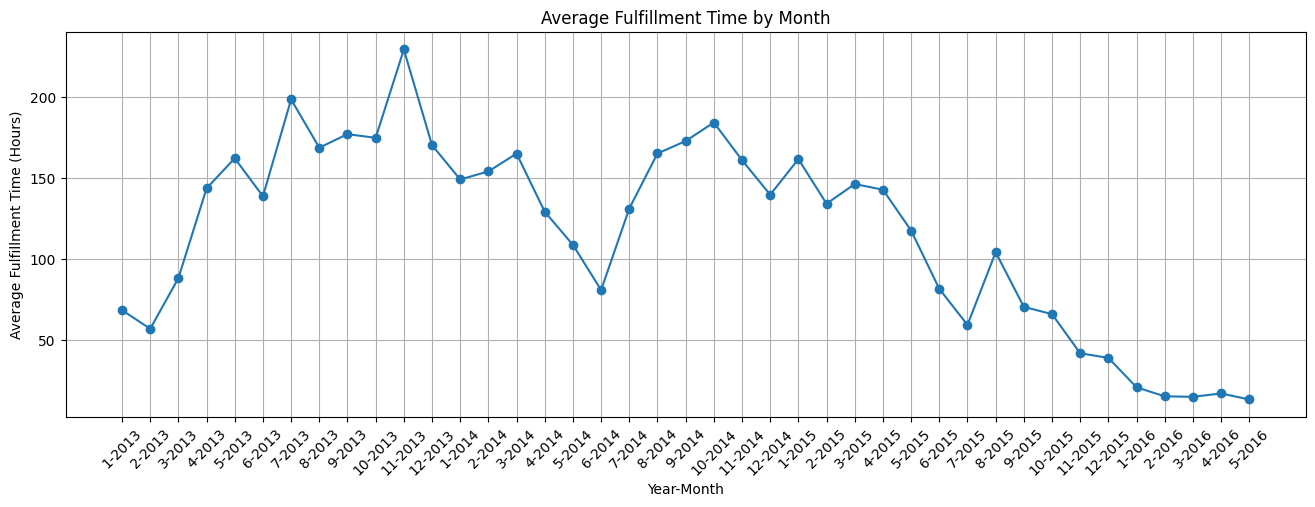

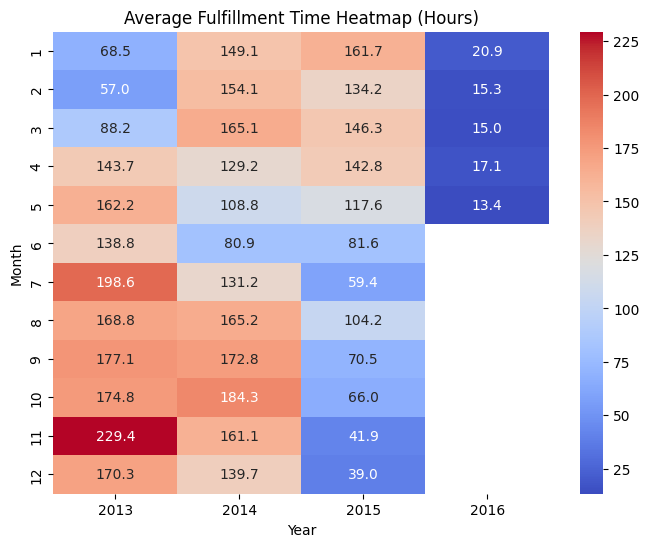

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(delay_by_month['Month'].astype(str) + '-' + delay_by_month['Year'].astype(str), 
         delay_by_month['Avg_complete_Time'], marker='o', linestyle='-')
plt.xlabel("Year-Month")
plt.ylabel("Average Fulfillment Time (Hours)")
plt.title("Average Fulfillment Time by Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Pivot table for heatmap
heatmap_data = delay_by_month.pivot(index="Month", columns="Year", values="Avg_complete_Time")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".1f")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Average Fulfillment Time Heatmap (Hours)")
plt.show()
